<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Create dataframe
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [3]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [4]:
mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [5]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [6]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

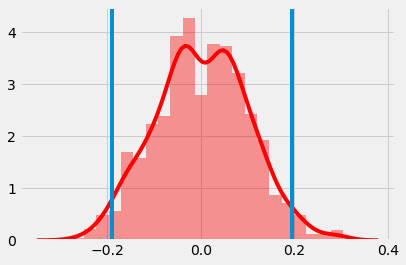

In [7]:
plt.style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [8]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=1000, size=1000)
t_df1000 = np.random.standard_t(df=100000, size=100000)

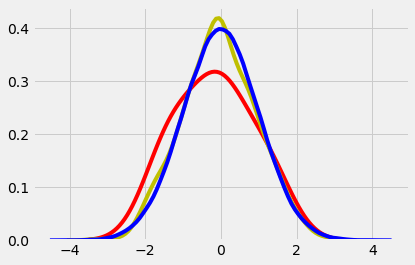

In [9]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

### As sample size increases, our estimates of sample statistics become more precise

In [10]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.17920138570009256
Standard Deviation: 0.9629868818640389
Variance: 0.9273437346422245
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.045793514105801604
Standard Deviation: 0.9768606255390022
Variance: 0.9542566817284507
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.0055553563682210014
Standard Deviation: 0.9998148609021809
Variance: 0.9996297560808473


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [11]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [12]:
# Very powerful library that can be used to do a lot of great things and stuff...
# import scipy.stats
# dir(scipy.stats)  # Look at all the stats methods

#### **mu** - represents the POPULATION average

#### **xbar** - represents the SAMPLE average

In [13]:
# Mean cooking time
xbar1 = 180
xbar2 = 178.5

# Std Dev cooking time
s1 = 5
s2 = 4.25

# Sample size of the two samples
n1 = 1000
n2 = 800

In [14]:
# Assume the cooking times are normally distributed
stove1 = np.random.normal(xbar1, s1, n1)
stove2 = np.random.normal(xbar2, s2, n2)

Text(0.5, 1.0, 'Stove 1 distribution')

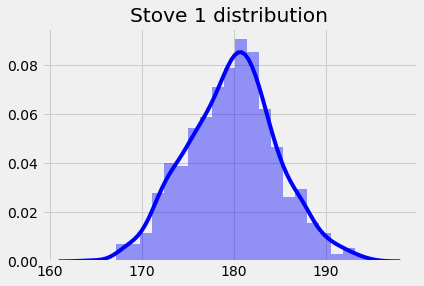

In [15]:
# Plot with seaborn distplot
ax = sns.distplot(stove1, color="b")
plt.title("Stove 1 distribution")

Text(0.5, 1.0, 'Stove 2 distribution')

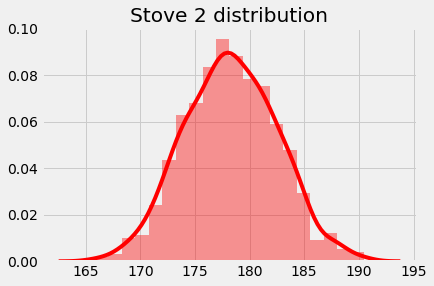

In [16]:
ax = sns.distplot(stove2, color="r")
plt.title("Stove 2 distribution")

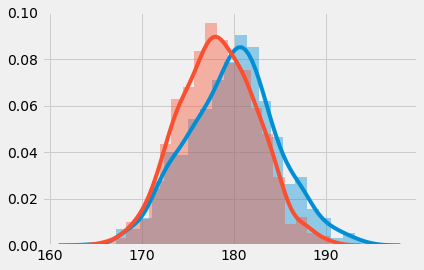

In [17]:
# Both in one graph
fig, ax = plt.subplots()
for sample in [stove1, stove2]:
    sns.distplot(sample)

## Inferential Statistics

(Two sample t-test - for means)

- Are the sample means of the two groups of pancake cooking times different?
- How different? - probability

### Two Sample T-test

#### 1. Null Hypothesis (boring hypothesis)

No difference in cooking times.

$\bar{x}_1 = \bar{x}_2$

#### 2. Alternative Hypothesis (interesting hypothesis)

The mean cooking times between the two burners are different.

$\bar{x}_1 ≠ \bar{x}_2$

#### 3. Confidence Level (the probability of seeing a true result in spite of random variability)

Typically 95%, 99%, 99.9%

What does a 95% CL mean? We will be tricked into thinking the wrong thing 5% of the time, or thinking the right thing 95% of the time.

#### 4. Run the T-test to get T-stat

#### 5. Get p-value

In [18]:
# 4. Run T-test
ttest_ind(stove1, stove2)

Ttest_indResult(statistic=7.085193497662337, pvalue=1.985518177076385e-12)

#### T-statistic = 5.94

#### P-value: .00000000035

##### What is a P-value?

It's the prob that I would have observed this result (two means given their sample sizes) due to random choice. (Having been unlucky)

P-value that is < (1-Confidence Level) - which in our case is 0.05 - then I will reject the null hypothesis.

We never "accept" the null hypothesis; we only "reject", or "fail to reject" the null hypothesis.

---

#### Conclustion

Due to our test resulting in a t-stat of 5.94, and having a p-value of 3.5e-9, we reject the null hypothesis that the two stove burners cook pancakes at a similar rate, and suggest the alternative that the pancake cooking times are different.

---

What if my p-value had been .04999999999?

Reject the null hypothesis

What if my p-value had been .050000000001?

Fail to reject the null hypothesis


---

In [19]:
# from scipy.stats import t

# Looks up a t-statistic for a confidence level and df (degrees of freedom)
# t.ppf(.95, 20)

---

### For the Assignment

In [20]:
# TODO: copy over last part of lecture notebook

#### Loading, cleaning, and separating the data

In [21]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 13:49:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.05s   

2019-09-16 13:49:14 (352 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [23]:
# Load Data
df_0 = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df_0.shape)
df_0.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [24]:
# Replace "?" with NaN values
df = df_0.replace({
    "?": np.NaN,
    "n": 0,
    "y": 1,
})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [25]:
# Filter Dems and Reps into separate dataframes
dem = df[df["party"] == "democrat"]
rep = df[df["party"] == "republican"]

In [26]:
# Those dataframes become our two "samples"
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [27]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [28]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

### 1 Sample t-Test

In [29]:
# Import the 1 sample t-test method
from scipy.stats import ttest_1samp

In [30]:
rep["budget"].mean()

0.13414634146341464

In [31]:
rep["budget"].isnull().sum()

4

In [32]:
# Sample size is length of column minus null rows
rep_sample_size = len(rep["budget"]) - rep["budget"].isnull().sum()
rep_sample_size

164

### Hypotheses

1. Null Hypothesis

In 1 sample t-tests, we get to choose our Null Hypothesis

$H_0$: 0.0 - There is zero Republican support for the bill.

2. Alternative Hypothesis

$H_a$: $\bar{x} ≠ 0$ - There is non-zero support for the budget bill among Republicans.

3. Confidence Level

95% or .95

In [33]:
# Run a 1-sample t-test, providing the sample and the null hypothesis
# Pass `nan_policy="omit"` when the column has null values
ttest_1samp(rep["budget"], 0, nan_policy="omit")

Ttest_1sampResult(statistic=5.02528816355446, pvalue=1.3107521045196396e-06)

#### Result

4. t-statistic: 5.025

5. p-value: 0.00000131

---- µ ----

#### Conclusion

With a p-value of 0, I reject the null hypothesis that Republican support is zero. Therefore, I can conclude that Republican support for the budget bill is non-zero.

---

### 2-Sample t-Test

In [34]:
# This time use both Rep and Dem
# With 2-sample t-test, the null hypothesis is that the means of the samples are equal
ttest_ind(rep["budget"], dem["budget"], nan_policy="omit")

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)

In [35]:
rep["budget"].mean()

0.13414634146341464

In [37]:
dem["budget"].mean()  # Much more supportive of the bill than Rep sample

0.8884615384615384

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means